# Check Tokimoto's potentials for reproducing the phaseshifts

#### It is considered null spin-orbit potentials

| lc,Jc    | $s_{1/2}$ | $p_{3/2}$ | $p_{1/2}$ | $d_{5/2}$ | $d_{3/2}$ | $f_{7/2}$ | $f_{5/2}$ |
|:---------|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| Vc (MeV) | 62.74     | 75.031    | 73.392    | 64.41     | 60.42     | 72.08     | 64.25     |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# Ivanovich data
df_Ivan = pd.DataFrame({
    'E_alpha': [5.07, 6.64, 8.20, 9.76, 10.92],
    'd0': [-46.2, -57.1, -64.6, -56.3, -65.6],
    'd1+': [153.6, 146.7, 140.1, 138.4, 129.9],
    'd1-': [150.2, 144.9, 135.2, 133.5, 124.1],
    'd2+': [-1.1, -2.2, -3.6, -5.3, -6.8],
    'd2-': [-1.1, -2.2, -3.6, -5.3, -6.8],
    'd3+': [78.1, 173.4, 173.8, 171.8, 174.0],
    'd3-': [3.3, 5.1, 21.6, 76.3, 121.5]
})

ma = 4.002603254 
mt = 3.016049281
mu = (ma*mt)/(ma+mt)
print(mu)

df_Ivan[ 'E_cm' ] = df_Ivan[ 'E_alpha' ] * mu/ma

df_Ivan

1.719995199385513


,E_alpha,d0,d1+,d1-,d2+,d2-,d3+,d3-,E_cm
0,5.07,-46.2,153.6,150.2,-1.1,-1.1,78.1,3.3,2.178676
1,6.64,-57.1,146.7,144.9,-2.2,-2.2,173.4,5.1,2.853335
2,8.20,-64.6,140.1,135.2,-3.6,-3.6,173.8,21.6,3.523697
3,9.76,-56.3,138.4,133.5,-5.3,-5.3,171.8,76.3,4.194059
4,10.92,-65.6,129.9,124.1,-6.8,-6.8,174.0,121.5,4.692533


In [4]:
# Read .dep file

def df_from_dep(name:str):
    with open(name) as f:
        lines = [line.replace('D', 'E') for line in f]
    
    from io import StringIO
    data = StringIO("".join(lines))
    
    df = pd.read_csv(data, sep=r'\s+', header=None)
    assert df.shape[1] == 4, f"Error: el DataFrame tiene {df.shape[1]} columnas, se esperaban 4."
    
    df.columns = ['E_MeV', 'phase_rad', 'dp/dE', 'ftan']
    
    # d1 : phaseshift (in radian)
    # d2 : numerical derivative of the phaseshift with energy, obtained with a Simpson method (in rad/MeV)
    # d3 : function of the phaseshift that enables one to infer the scattering lenth ( -tan(delta_lj)/k^(2l+1) )

    df['phase_deg'] = df['phase_rad']*180/np.pi

    return df

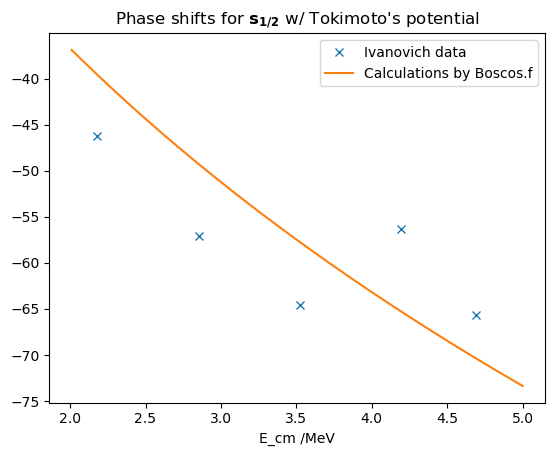

In [5]:
df_Tok_s = df_from_dep("./results/Li7Tok_s.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d0'], 'x', label='Ivanovich data')
# plt.errorbar(df_Ivan['E_cm'], 
#              df_Ivan['d0'], 
#              yerr=np.vstack([np.abs(np.array(df_Ivan['d0']))*0.02]*2), 
#              fmt='x', markersize=5, capsize=3, label='Ivanovich data')

plt.plot(df_Tok_s['E_MeV'], df_Tok_s['phase_deg'], label='Calculations by Boscos.f')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{s_{1/2}}$ w/ Tokimoto's potential")
plt.legend()

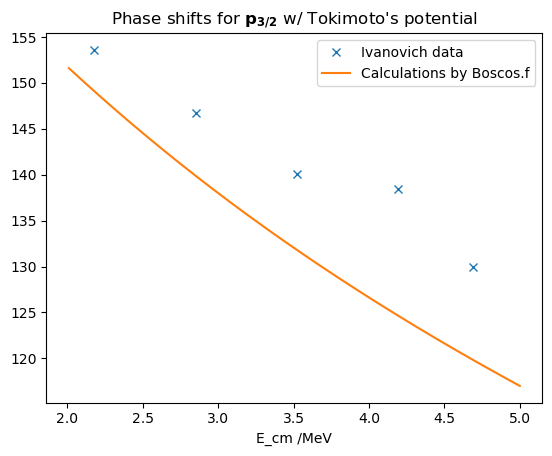

In [6]:
df_Tok_pp = df_from_dep("./results/Li7Tok_pp.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d1+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_pp['E_MeV'], df_Tok_pp['phase_deg']+180, label='Calculations by Boscos.f')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{p_{3/2}}$ w/ Tokimoto's potential")
plt.legend()

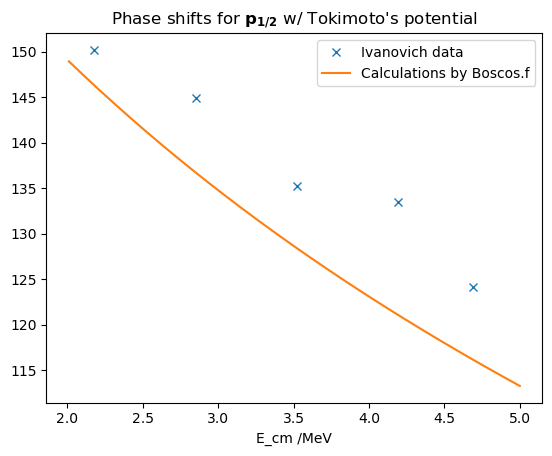

In [7]:
df_Tok_pm = df_from_dep("./results/Li7Tok_pm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d1-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_pm['E_MeV'], df_Tok_pm['phase_deg']+180, label='Calculations by Boscos.f')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{p_{1/2}}$ w/ Tokimoto's potential")
plt.legend()

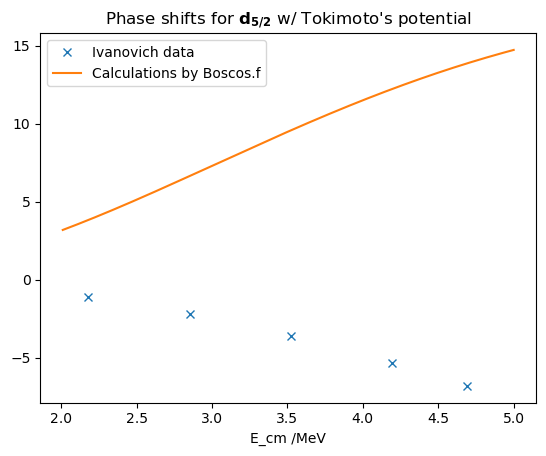

In [8]:
df_Tok_dp = df_from_dep("./results/Li7Tok_dp.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d2+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dp['E_MeV'], df_Tok_dp['phase_deg'], label='Calculations by Boscos.f')
# plt.plot(df_Tok_dp['E_MeV'], -df_Tok_dp['phase_deg'], '-.', label='Reflected Calculations')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{d_{5/2}}$ w/ Tokimoto's potential")
plt.legend()

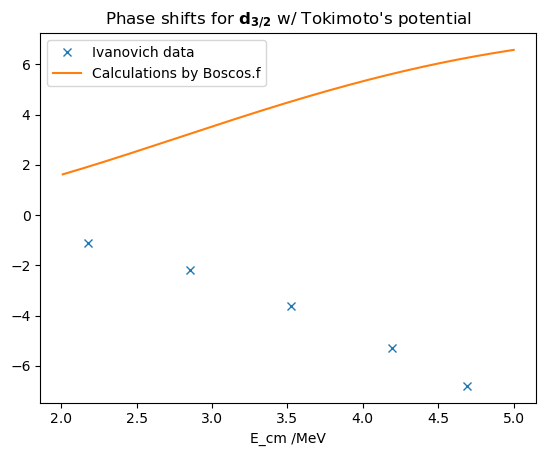

In [9]:
df_Tok_dm = df_from_dep("./results/Li7Tok_dm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d2-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dm['E_MeV'], df_Tok_dm['phase_deg'], label='Calculations by Boscos.f')
# plt.plot(df_Tok_dm['E_MeV'], -df_Tok_dm['phase_deg'], '-.', label='Reflected Calculations')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{d_{3/2}}$ w/ Tokimoto's potential")
plt.legend()

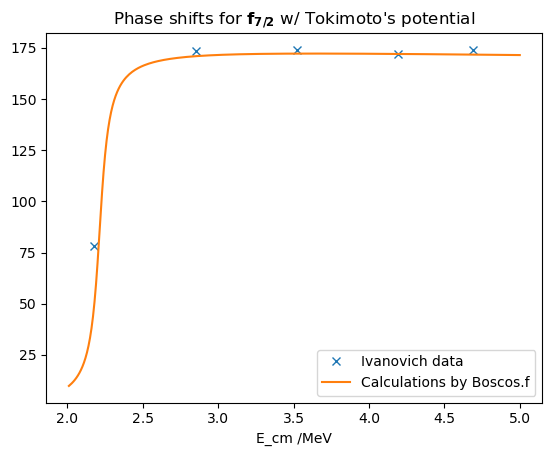

In [10]:
df_Tok_fp = df_from_dep("./results/Li7Tok_fp.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d3+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_fp['E_MeV'], df_Tok_fp['phase_deg'], label='Calculations by Boscos.f')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{f_{7/2}}$ w/ Tokimoto's potential")
plt.legend()

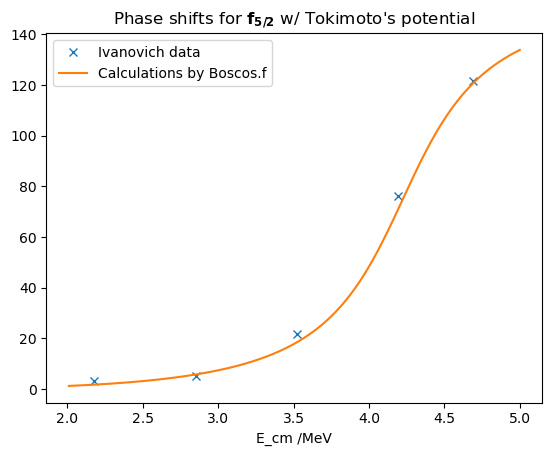

In [11]:
df_Tok_fm = df_from_dep("./results/Li7Tok_fm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d3-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_fm['E_MeV'], df_Tok_fm['phase_deg'], label='Calculations by Boscos.f')

plt.xlabel("E_cm /MeV")
plt.title(r"Phase shifts for $\mathbf{f_{5/2}}$ w/ Tokimoto's potential")
plt.legend()

## Conclusions 

#### For $s_{1/2}$, $f_{7/2}$, $f_{5/2}$ Tokimoto potentials **reproduce quite well** Ivanovich data

#### For $p_{3/2}$, $p_{1/2}$ calculations are **offsetted**. 

For this bound states, the binding energy is not reproduced. 

$E_{p_{3/2}} = -2.12094162 \ MeV \qquad E_{ground} = -2.467000 \ MeV $

$E_{p_{1/2}} = -1.67210197 \ MeV \qquad E_{excited} = -1.990390 \ MeV $

Note: $ANC_{p_{3/2}} = 3.24687240 \ fm^{-1/2} \qquad ANC_{p_{1/2}} = 2.67645907 \ fm^{-1/2}$

#### For $d_{5/2}$, $d_{3/2}$ the trend is **completly opposite** but in same magnitude (--> angle reflection is allowed ??)



# Refit potential depth for p-waves to reproduce binding energy

After the done exploration, where varing convetions and inclusion of spin-orbit part didn't have a significant impact in phase shift. 
We will fit to more decimals of binding energy using just central potential and empirical masses and radius.

Refit is performed by itering manually secant method. 

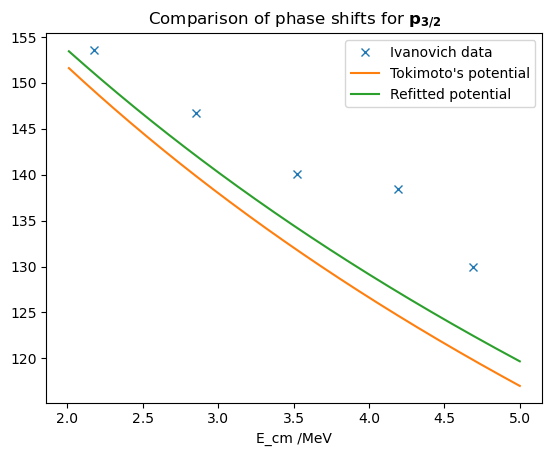

In [14]:
df_refit_pp = df_from_dep("./results/Li7refit_pp.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d1+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_pp['E_MeV'], df_Tok_pp['phase_deg']+180, label="Tokimoto's potential")
plt.plot(df_refit_pp['E_MeV'], df_refit_pp['phase_deg']+180, label="Refitted potential")


plt.xlabel("E_cm /MeV")
# plt.title(r"Comparation of phase shifts for $p_{3/2}$")
# r"$\mathbf{texto}$"
plt.title(r"Comparison of phase shifts for $\mathbf{p_{3/2}}$")
plt.legend()

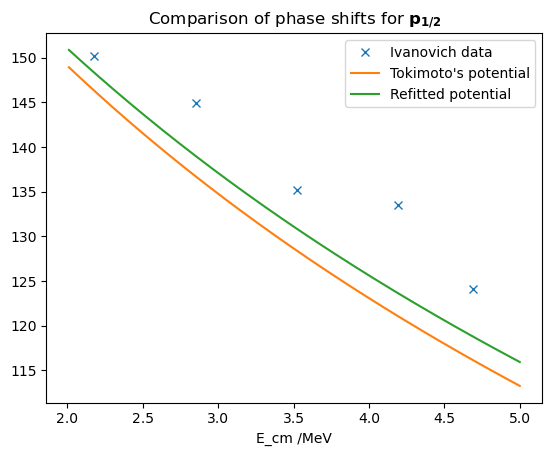

In [15]:
df_refit_pm = df_from_dep("./results/Li7refit_pm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d1-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_pp['E_MeV'], df_Tok_pm['phase_deg']+180, label="Tokimoto's potential")
plt.plot(df_refit_pp['E_MeV'], df_refit_pm['phase_deg']+180, label="Refitted potential")


plt.xlabel("E_cm /MeV")
plt.title(r"Comparison of phase shifts for $\mathbf{p_{1/2}}$")
plt.legend()

## Conclusions

#### The offset has decreased but not enough :(

$E_{p_{3/2}} = -2.46700007 \ MeV \qquad E_{ground} = -2.467000 \ MeV $

$E_{p_{1/2}} = -1.99038993 \ MeV \qquad E_{excited} = -1.990390 \ MeV $

Note: $ANC_{p_{3/2}} = 3.70308755 \ fm^{-1/2} \qquad ANC_{p_{1/2}} = 3.07858087 \ fm^{-1/2}$


### Optimization log: Ground fit
+ (-75.031, -2.12094162)
+ (-76.24, -2.46763222)
+ (-76.23779528, -2.46698847)
+ (-76.23783539, -2.46700018)
  
rounded Vc result-> (-76.237835, -2.46700007)

### Optimization log: Excited fit
+ (-73.392, -1.97210197)
+ (-74.593, -1.99853897)
+ (-74.57460552, -1.99343833)
+ (-74.5636123, -1.99039168)
+ (-74.56360624, -1.99039000)

rounded Vc result-> (-74.563606, -1.99038993)

# Try null potential for d-waves
As the measurements for phase shifts of d-waves are quite near zero, let's try null central potential

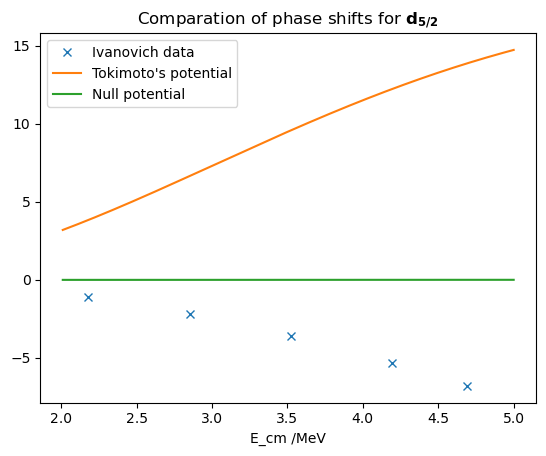

In [18]:
df_null_dp = df_from_dep("./results/Li7null_dp.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d2+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dp['E_MeV'], df_Tok_dp['phase_deg'], label="Tokimoto's potential")
plt.plot(df_null_dp['E_MeV'], df_null_dp['phase_deg'], label="Null potential")

plt.xlabel("E_cm /MeV")
plt.title(r"Comparation of phase shifts for $\mathbf{d_{5/2}}$")
plt.legend()

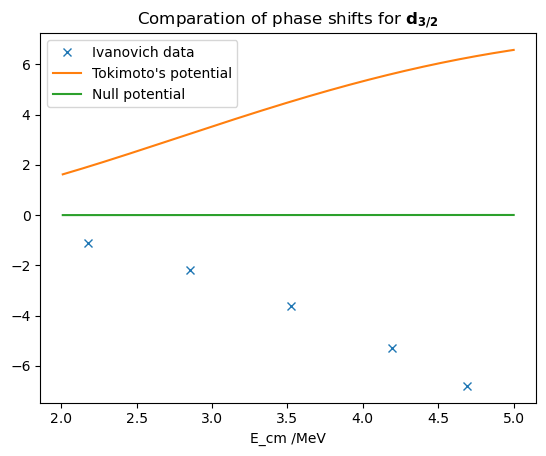

In [19]:
df_null_dm = df_from_dep("./results/Li7null_dm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d2-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dm['E_MeV'], df_Tok_dm['phase_deg'], label="Tokimoto's potential")
plt.plot(df_null_dm['E_MeV'], df_null_dm['phase_deg'], label="Null potential")

plt.xlabel("E_cm /MeV")
plt.title(r"Comparation of phase shifts for $\mathbf{d_{3/2}}$")
plt.legend()

## Conclusions 

#### With null potential the phase-shift is constant in cero. It makes sense. 

# Sum the contributions of partial waves with these potentials

In [22]:
# Read .sca file

def df_from_sca(name: str):
    # Leemos el archivo, saltando las 2 primeras líneas de cabecera
    df = pd.read_csv(
        name,
        sep=r'\s+',     
        header=None,
        skiprows=2
    )

    assert df.shape[1] == 6, (
        f"Error: el DataFrame tiene {df.shape[1]} columnas, se esperaban 6."
    )

    df.columns = [
        'Energy_MeV',       # (MeV)
        'k_fm_inv',         # (fm^{-1})
        'eta',              # adimensional
        'phase_deg',        # (degrees)
        'cross_section_b',  # (barn)
        'S_factor_MeVb'     # (MeV·barn)
    ]

    df['S_factor_KeVb'] = df['S_factor_MeVb']*1e3

    return df

Text(0, 0.5, 'S-factor / keV b')

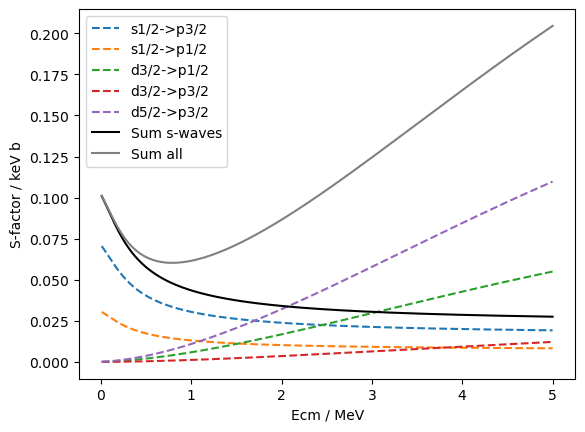

In [23]:
df_S_dm_pm = df_from_sca("./results/Li7WS_dm_pm.sca")
df_S_dm_pp = df_from_sca("./results/Li7WS_dm_pp.sca")
df_S_dp_pp = df_from_sca("./results/Li7WS_dp_pp.sca")
df_S_s_pm = df_from_sca("./results/Li7WS_s_pm.sca")
df_S_s_pp = df_from_sca("./results/Li7WS_s_pp.sca")

plt.plot(df_S_s_pp["Energy_MeV"], df_S_s_pp["S_factor_KeVb"], '--', label='s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_s_pm["S_factor_KeVb"], '--', label='s1/2->p1/2')
plt.plot(df_S_dm_pm["Energy_MeV"], df_S_dm_pm["S_factor_KeVb"], '--', label='d3/2->p1/2')
plt.plot(df_S_dm_pp["Energy_MeV"], df_S_dm_pp["S_factor_KeVb"], '--', label='d3/2->p3/2')
plt.plot(df_S_dp_pp["Energy_MeV"], df_S_dp_pp["S_factor_KeVb"], '--', label='d5/2->p3/2')

Sfactor_Ts = df_S_s_pp["S_factor_KeVb"] + df_S_s_pm["S_factor_KeVb"]
Sfactor_Tot = Sfactor_Ts + df_S_dm_pm["S_factor_KeVb"] + df_S_dm_pp["S_factor_KeVb"] + df_S_dp_pp["S_factor_KeVb"]

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Tot, 'gray', label='Sum all')

plt.legend()
plt.xlabel("Ecm / MeV")
plt.ylabel("S-factor / keV b")

## Conclusions

#### The contributions from d-waves seem too high.

# Compare the obtained S-factors with paper's data

In [26]:

df_Griffiths = pd.DataFrame({
    'EN_MEV': [0.35, 0.43, 0.56, 0.61, 0.86, 1.11, 1.32, 1.52, 1.83],
    'DATA_MB': [0.5E-04, 0.95E-04, 0.143E-03, 0.155E-03, 0.2E-03, 0.315E-03, 0.358E-03, 0.4E-03, 0.44E-03],
    'ERR-T_MB': [0.15E-04, 0.25E-04, 0.3E-04, 0.4E-04, 0.5E-04, 0.6E-04, 0.6E-04, 0.8E-04, 0.9E-04],
    '1DATA_B*KEV': [0.0615, 0.0730, 0.0690, 0.0645, 0.0530, 0.0045, 0.0632, 0.0645, 0.064]
})
df_Griffiths
# df_Griffiths['Sommerfeld1'] = np.log( df_Griffiths['1DATA_B*KEV']/df_Griffiths['DATA_MB']/(df_Griffiths['EN_MEV']) )/(2*np.pi) # /mu*ma
df_Griffiths['Sommerfeld2'] =  0.1574854051886 * 2*1* np.sqrt(mu/df_Griffiths['EN_MEV'])
# df_Griffiths['Sfactor_MB*MEV'] = df_Griffiths['DATA_MB'] * df_Griffiths['EN_MEV'] * np.exp(2*np.pi * df_Griffiths['Sommerfeld2'])
df_Griffiths['cs'] = df_Griffiths['1DATA_B*KEV']/df_Griffiths['EN_MEV']/np.exp(2*np.pi * df_Griffiths['Sommerfeld2'])

df_Brune = pd.DataFrame({
    'EN-CM_KEV': [5.5083E+01, 7.4340E+01, 9.3510E+01, 1.1243E+02, 1.5912E+02, 2.0073E+02, 2.4477E+02, 2.8693E+02, 3.3125E+02, 3.7306E+02, 4.1742E+02, 5.0599E+02,
                 5.5955E+02, 6.7917E+02, 8.4978E+02, 1.0212E+03, 1.1894E+03],
    'DATA_B*KEV': [9.2869E-02, 8.8675E-02, 8.5454E-02, 8.5480E-02, 8.0018E-02, 7.4788E-02, 7.3096E-02, 6.8679E-02, 6.8171E-02, 6.4657E-02, 6.2534E-02, 6.2555E-02,
                  6.2396E-02, 5.9248E-02, 6.0480E-02, 6.5536E-02, 6.7765E-02],
    'DATA-ERR_B*KEV': [  6.2146E-03, 4.2274E-03, 3.3215E-03, 2.2601E-03, 2.1137E-03, 1.3889E-03, 1.2489E-03, 1.1399E-03, 1.3165E-03, 1.0261E-03, 3.6422E-04,
                       9.4227E-04, 1.8233E-03, 6.3766E-04, 7.0857E-04, 2.1271E-03, 2.3297E-03],
})
df_Brune

df_Bystritsky = pd.DataFrame({
    'EN-CM_KEV': [15.7],
    'DATA_B*KEV': [0.091],
    'ERR-S_B*KEV': [0.032],
    'ERR-SYS_B*KEV': [0.011]
})
df_Bystritsky

df_Holmgren = pd.DataFrame({
    'EN_MEV': [0.484, 0.719, 0.940, 1.134, 1.328], # Alpha energy
    'DATA_MICRO-B': [6.39E-01, 9.48E-01, 1.10E+00, 1.20E+00, 1.30E+00],
    'ERR-S_MICRO-B': [3.51E-02, 9.34E-02, 9.26E-02, 5.00E-02, 7.16E-02],
})
df_Holmgren
df_Holmgren['EN-CM_MEV'] = df_Holmgren['EN_MEV'] * mu / ma
df_Holmgren['Sommerfeld'] = 0.1574854051886 * 2*1* np.sqrt(mu/df_Holmgren['EN-CM_MEV'])
df_Holmgren['Sfactor_MB*MEV'] = df_Holmgren['DATA_MICRO-B']*1e-3 * df_Holmgren['EN_MEV'] * np.exp(2*np.pi* df_Holmgren['Sommerfeld'] )
df_Holmgren['Sfactor-ERR_MB*MEV'] = df_Holmgren['ERR-S_MICRO-B']*1e-3 * df_Holmgren['EN_MEV'] * np.exp(2*np.pi* df_Holmgren['Sommerfeld'] )


df_Schroder = pd.DataFrame({
    'EN-CM_MEV': [0.0779, 0.0932, 0.1208, 0.1422, 0.1635, 0.185, 0.2125, 0.2279, 0.2463, 0.28, 0.2891, 0.2984, 0.3229, 0.3381, 0.3658, 0.3842,
     0.3965, 0.4242, 0.4486, 0.464, ],
    'DATA_MB*MEV': [0.1352, 0.1276, 0.1239, 0.1213, 0.0974, 0.0999, 0.0861, 0.0961, 0.0848, 0.0898, 0.0759, 0.0809, 0.0797, 0.0658, 0.0821, 0.0834,
                    0.0884, 0.0921, 0.0783, 0.082],
    'DATA-ERR_MB*MEV': [0.0075, 0.0063, 0.0176, 0.0063, 0.0088, 0.0063, 0.0063, 0.0063, 0.0038, 0.0088, 0.0075, 0.0075, 0.0075, 0.0113, 0.0075, 0.0063, 0.0063,
                        0.0063, 0.0075, 0.0075],
})
df_Schroder

df_Tokimoto = pd.DataFrame({
    'EN-CM_MEV': [0.10000, 0.15000, 0.20000, 0.25000, 0.30000, 0.35000, 0.40000, 0.45000, 0.50000],
    '1DATA_B*KEV': [0.11940, 0.056793, 0.062277, 0.059286, 0.054647, 0.047107, 0.054005, 0.049821, 0.055512],
    '1DATA-ERR_B*KEV': [0.032921, 0.011170, 0.0073743, 0.0064109, 0.0050578, 0.0044988, 0.0043675, 0.0047228, 0.0046550 ],
    '2DATA_B*KEV': [0.1686371, 0.1268339, 0.1125868, 0.09715452, 0.06960442, 0.07552728, 0.07141581, 0.06970487, 0.06064004 ],
    '2DATA-ERR_B*KEV': [0.03187356, 0.01282016, 0.00935439, 0.00687489, 0.00525669, 0.00547622, 0.00484125, 0.00515533, 0.00454367],
})
df_Tokimoto

df_Utsunomiya = pd.DataFrame({
    'e_KEV': [80, 130, 180, 230, 280, 330, 380, 430, 480, 530, 580, 630, 680, 730, 780, 830, 880, 930, 980], 
    'S(e)_B*KEV': [0.35, 0.15, 0.11, 0.095, 0.082, 0.071, 0.069, 0.064, 0.063, 0.060, 0.059, 0.057, 0.054, 0.053, 0.056, 0.055, 0.054, 0.056, 0.059], 
    'Error-plus_B*KEV': [0.14, 0.04, 0.01, 0.007, 0.011, 0.014, 0.008, 0.007, 0.006, 0.003, 0.004, 0.005, 0.005, 0.007, 0.009, 0.007, 0.007, 0.011, 0.009], 
    'Error-minus_B*KEV': [0.13, 0.05, 0.012, 0.010, 0.010, 0.012, 0.006, 0.006, 0.005, 0.005, 0.005, 0.004, 0.004, 0.009, 0.009, 0.007, 0.007, 0.010, 0.009], 
})
df_Utsunomiya

df_Griffiths

,EN_MEV,DATA_MB,ERR-T_MB,1DATA_B*KEV,Sommerfeld2,cs
0,0.35,0.000050,0.000015,0.0615,0.698232,0.002185
1,0.43,0.000095,0.000025,0.0730,0.629941,0.003243
2,0.56,0.000143,0.000030,0.0690,0.552001,0.003840
3,0.61,0.000155,0.000040,0.0645,0.528894,0.003811
4,0.86,0.000200,0.000050,0.0530,0.445435,0.003752
5,1.11,0.000315,0.000060,0.0045,0.392078,0.000345
6,1.32,0.000358,0.000060,0.0632,0.359540,0.005001
7,1.52,0.000400,0.000080,0.0645,0.335052,0.005169
8,1.83,0.000440,0.000090,0.0640,0.305357,0.005134


Text(0.5, 1.0, 'All data in Bystritsky Fig 11 style')

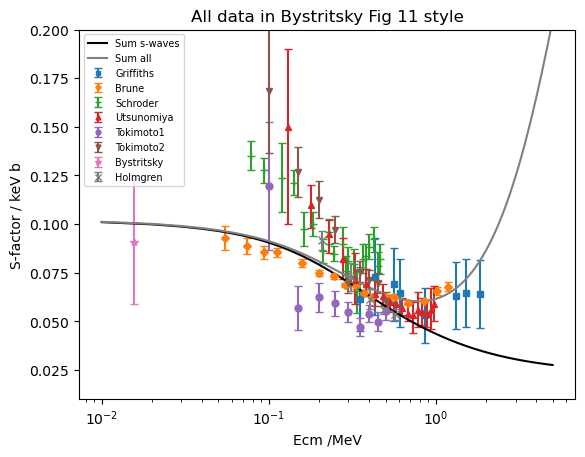

In [27]:
# All of them
plt.errorbar(df_Griffiths['EN_MEV'], 
             df_Griffiths['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Griffiths['1DATA_B*KEV'])*0.27]*2), 
             fmt='s', markersize=4, capsize=3, label='Griffiths')

plt.errorbar(df_Brune['EN-CM_KEV']*1e-3, 
             df_Brune['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Brune['DATA-ERR_B*KEV'])]*2), 
             fmt='D', markersize=4, capsize=3, label='Brune')

plt.errorbar(df_Schroder['EN-CM_MEV'], 
             df_Schroder['DATA_MB*MEV'], 
             yerr=np.vstack([np.array(df_Schroder['DATA-ERR_MB*MEV'])]*2), 
             fmt='+', markersize=6, capsize=3, label='Schroder')

plt.errorbar(df_Utsunomiya['e_KEV']*1e-3, 
             df_Utsunomiya['S(e)_B*KEV'], 
             yerr=np.vstack([
                 np.array(df_Utsunomiya['Error-minus_B*KEV']), 
                 np.array(df_Utsunomiya['Error-plus_B*KEV']), 
             ]), 
             fmt='^', markersize=5, capsize=3, label='Utsunomiya')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['1DATA-ERR_B*KEV'])]*2), 
             fmt='o', markersize=5, capsize=3, label='Tokimoto1')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['2DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['2DATA-ERR_B*KEV'])]*2), 
             fmt='v', markersize=5, capsize=3, label='Tokimoto2')

plt.errorbar(df_Bystritsky['EN-CM_KEV']*1e-3, 
             df_Bystritsky['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Bystritsky['ERR-S_B*KEV'])]*2), 
             fmt='*', markersize=6, capsize=3, label='Bystritsky')


# plt.plot(df_Holmgren['EN-CM_MEV'], df_Holmgren['Sfactor_MB*MEV'], 'x', markersize=4, label='Holmgren')

plt.errorbar(df_Holmgren['EN-CM_MEV'],
             df_Holmgren['Sfactor_MB*MEV'], 
             yerr=np.vstack([np.array(df_Holmgren['Sfactor-ERR_MB*MEV'])]*2), 
             fmt='x', markersize=6, capsize=3, label='Holmgren')

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Tot, 'gray', label='Sum all')

plt.xscale('log')
plt.legend(fontsize=7, markerscale=0.7)
plt.xlabel("Ecm /MeV")
plt.ylabel("S-factor / keV b")
plt.ylim((0.01, 0.2))
plt.title("All data in Bystritsky Fig 11 style")

## Conclusions 
#### Suming contributions from d-waves and s-waves, they have the same tail at low energies and match better around 1 MeV.
It is not that catastrophic that increasing trend of d-waves contributions. 

# Calculate the E2 transitions from f-waves to check if not significant

Text(0, 0.5, 'S-factor / keV b')

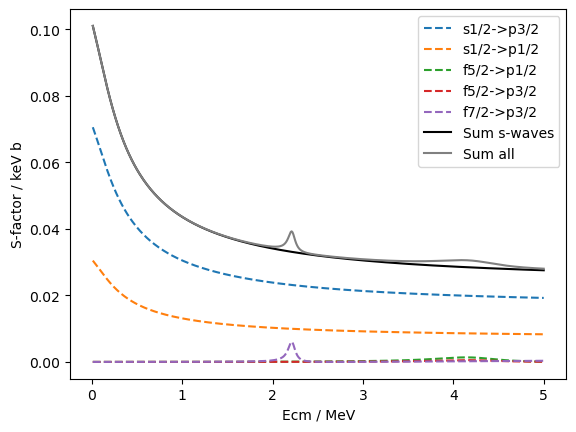

In [30]:
%matplotlib inline
# %matplotlib qt
df_S_fm_pm = df_from_sca("./results/Li7WS_fm_pm.sca")
df_S_fm_pp = df_from_sca("./results/Li7WS_fm_pp.sca")
df_S_fp_pp = df_from_sca("./results/Li7WS_fp_pp.sca")

plt.plot(df_S_s_pp["Energy_MeV"], df_S_s_pp["S_factor_KeVb"], '--', label='s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_s_pm["S_factor_KeVb"], '--', label='s1/2->p1/2')
plt.plot(df_S_fm_pm["Energy_MeV"], df_S_fm_pm["S_factor_KeVb"], '--', label='f5/2->p1/2')
plt.plot(df_S_fm_pp["Energy_MeV"], df_S_fm_pp["S_factor_KeVb"], '--', label='f5/2->p3/2')
plt.plot(df_S_fp_pp["Energy_MeV"], df_S_fp_pp["S_factor_KeVb"], '--', label='f7/2->p3/2')

Sfactor_Ts_f = Sfactor_Ts + df_S_fm_pm["S_factor_KeVb"] + df_S_fm_pp["S_factor_KeVb"] + df_S_fp_pp["S_factor_KeVb"]

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Ts_f, 'gray', label='Sum all')

plt.legend()
plt.xlabel("Ecm / MeV")
plt.ylabel("S-factor / keV b")

## Conclusions
#### The aren´t significat 
#### They reproduce the resonances at E_alpha = 5MeV and 10MeV (E_cm = 2.15 & 4.3 MeV) founded in Fig 9 Ivanovich 

## Conclusions

#### Clearly small contributions, in particular in interest region of Ecm < 1MeV

Thus, we may consider that the discrepancy with d-waves is because an inappropriate potential. The code is working well. 

# Refit d-waves potential depths to reproduce the phase shifts. 

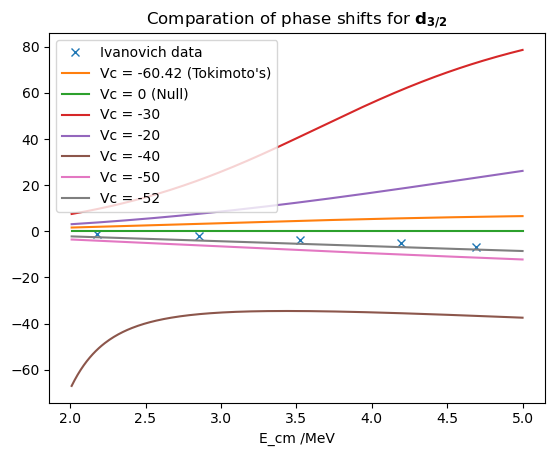

In [33]:
df_refit1_dm = df_from_dep("./results/Li7refit1_dm.dep")
df_refit2_dm = df_from_dep("./results/Li7refit2_dm.dep")
df_refit3_dm = df_from_dep("./results/Li7refit3_dm.dep")
df_refit4_dm = df_from_dep("./results/Li7refit4_dm.dep")
df_refit5_dm = df_from_dep("./results/Li7refit5_dm.dep")

plt.plot(df_Ivan['E_cm'], df_Ivan['d2-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dm['E_MeV'], df_Tok_dm['phase_deg'], label="Vc = -60.42 (Tokimoto's)")
plt.plot(df_null_dm['E_MeV'], df_null_dm['phase_deg'], label="Vc = 0 (Null)")
plt.plot(df_refit1_dm['E_MeV'], df_refit1_dm['phase_deg'], label="Vc = -30")
plt.plot(df_refit2_dm['E_MeV'], df_refit2_dm['phase_deg'], label="Vc = -20")
plt.plot(df_refit3_dm['E_MeV'], df_refit3_dm['phase_deg'], label="Vc = -40")
plt.plot(df_refit4_dm['E_MeV'], df_refit4_dm['phase_deg'], label="Vc = -50")
plt.plot(df_refit5_dm['E_MeV'], df_refit5_dm['phase_deg'], label="Vc = -52")


plt.xlabel("E_cm /MeV")
plt.title(r"Comparation of phase shifts for $\mathbf{d_{3/2}}$")
plt.legend()

## Conclusions
#### The changing Vc seem to change phase shift continously, with a discontinuity between Vc in (-40, -30)
#### The optimum value for the potential seem to be between Vc = (-50, -60) with Vc ~ -52
# -> ONLY VALID FOR d3/2 

In [34]:
# d3/2 Ivanovich regression
Ivan_dm = LinearRegression()
Ivan_dm.fit(df_Ivan[['E_cm']], df_Ivan['d2-'])
print('r2:', Ivan_dm.score(df_Ivan[['E_cm']], df_Ivan['d2-']))
print(Ivan_dm.coef_, Ivan_dm.intercept_)

# d5/2 Ground Ivanovich regression
Ivan_dp = LinearRegression()
Ivan_dp.fit(df_Ivan[['E_cm']], df_Ivan['d2+'])
print('r2:', Ivan_dp.score(df_Ivan[['E_cm']], df_Ivan['d2+']))
print(Ivan_dp.coef_, Ivan_dp.intercept_)

## Conclusions
#### As Ivanovich data is the same for d3/2, d5/2 the regression lines coincide

Ivan_d = Ivan_dp
print(Ivan_d.coef_, Ivan_d.intercept_)

r2: 0.9877242204528504
[-2.26563239] 4.103567771035113
r2: 0.9877242204528504
[-2.26563239] 4.103567771035113
[-2.26563239] 4.103567771035113


In [35]:
E_arr = np.linspace(2,5,300)
def RMSE(m1, b1, m2, b2):
    diff_y = m1*E_arr+b1 -( m2*E_arr+b2 )
    sq_diff_y = diff_y**2
    return np.sqrt(np.mean(sq_diff_y))

def fit_loss(filename): # e.g filename = "./results/Li7refit1_dm.dep"
    df = df_from_dep(filename)
    lm_df =  LinearRegression()
    lm_df.fit(df[['E_MeV']], df['phase_deg'])
    return RMSE(Ivan_d.coef_, Ivan_d.intercept_, lm_df.coef_[0], lm_df.intercept_)

{60.42: 8.869042392445458,
 50: 4.235689673293619,
 52: 1.5813095786213724,
 53: 0.5887780307659146,
 53.5: 0.696276921637032,
 53.25: 0.5639910219154187,
 53.125: 0.554730874271605,
 53.1875: 0.5538728276888188,
 53.15625: 0.5529143329614645,
 53.171875: 0.5530470160755816}

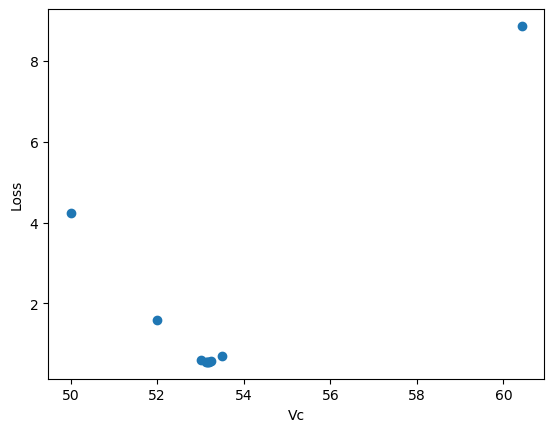

In [36]:
# - - - d3/2 fit - - -
# Let's apply a manual bisection method
## Assuming unique minimum and continuity
iter_log = {60.42:fit_loss("./results/Li7Tok_dm.dep"),
            50: fit_loss("./results/Li7refit4_dm.dep"),
            52:fit_loss("./results/Li7refit5_dm.dep"),
            53:fit_loss("./results/Li7bisec1_dm.dep"),
            53.5:fit_loss("./results/Li7bisec2_dm.dep"),
            53.25:fit_loss("./results/Li7bisec3_dm.dep"),
            53.125:fit_loss("./results/Li7bisec4_dm.dep"),
            53.1875:fit_loss("./results/Li7bisec5_dm.dep"),
            53.15625:fit_loss("./results/Li7bisec6_dm.dep"),
            53.171875:fit_loss("./results/Li7bisec7_dm.dep")
           }
# result : Vc = 53.164

plt.scatter(iter_log.keys(), iter_log.values())
plt.xlabel("Vc")
plt.ylabel("Loss")
# plt.xlim((53,54))
# plt.ylim((0,1))
iter_log

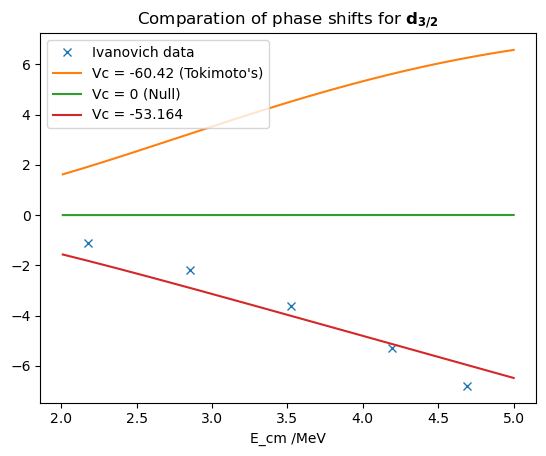

In [37]:
df_phsh_dm = df_from_dep("./results/Li7phsh_dm.dep")
plt.plot(df_Ivan['E_cm'], df_Ivan['d2-'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dm['E_MeV'], df_Tok_dm['phase_deg'], label="Vc = -60.42 (Tokimoto's)")
plt.plot(df_null_dm['E_MeV'], df_null_dm['phase_deg'], label="Vc = 0 (Null)")
plt.plot(df_phsh_dm['E_MeV'], df_phsh_dm['phase_deg'], label="Vc = -53.164")

plt.xlabel("E_cm /MeV")
plt.title(r"Comparation of phase shifts for $\mathbf{d_{3/2}}$")
plt.legend(loc='upper left')

## Conclusion 
#### The optimum Vc does not match exactly the data, is seems to have a smaller slope

Text(0, 0.5, 'S-factor / keV b')

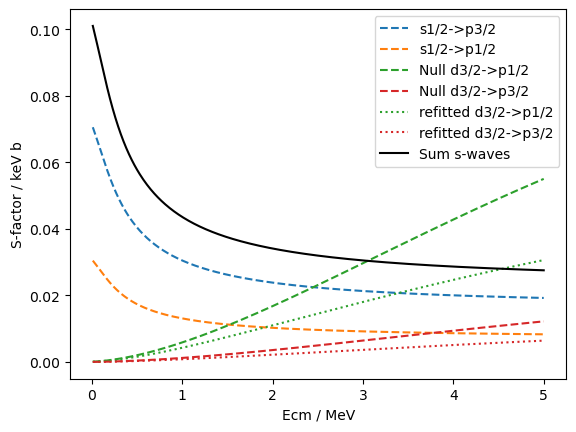

In [38]:
df_S_dm2_pm = df_from_sca("./results/Li7WS_dm2_pm.sca")
df_S_dm2_pp = df_from_sca("./results/Li7WS_dm2_pp.sca")

plt.plot(df_S_s_pp["Energy_MeV"], df_S_s_pp["S_factor_KeVb"], '--', label='s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_s_pm["S_factor_KeVb"], '--', label='s1/2->p1/2')
plt.plot(df_S_dm_pm["Energy_MeV"], df_S_dm_pm["S_factor_KeVb"], '--', label='Null d3/2->p1/2')
plt.plot(df_S_dm_pp["Energy_MeV"], df_S_dm_pp["S_factor_KeVb"], '--', label='Null d3/2->p3/2')
# plt.plot(df_S_dp_pp["Energy_MeV"], df_S_dp_pp["S_factor_KeVb"], '--', label='d5/2->p3/2')
plt.plot(df_S_dm2_pm["Energy_MeV"], df_S_dm2_pm["S_factor_KeVb"], 'C2:', label='refitted d3/2->p1/2')
plt.plot(df_S_dm2_pp["Energy_MeV"], df_S_dm2_pp["S_factor_KeVb"], 'C3:', label='refitted d3/2->p3/2')


plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')

plt.legend()
plt.xlabel("Ecm / MeV")
plt.ylabel("S-factor / keV b")

## Conclusions 
#### The contributions of transitions from d3/2 are smaller than Tokimoto's.
#### The assumptions for the fitting method performed correctly, we will mantain them for d5/2 fit.

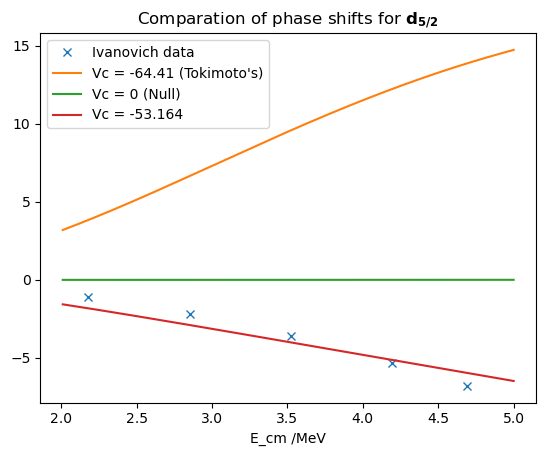

In [39]:
# - - - d5/2 fit - - -
# Check similitudes with d3/2

df_refit_dp = df_from_dep("./results/Li7refit_dp.dep")

plt.plot(df_Ivan['E_cm'], df_Ivan['d2+'], 'x', label='Ivanovich data')
plt.plot(df_Tok_dp['E_MeV'], df_Tok_dp['phase_deg'], label="Vc = -64.41 (Tokimoto's)")
plt.plot(df_null_dp['E_MeV'], df_null_dp['phase_deg'], label="Vc = 0 (Null)")
plt.plot(df_refit_dp['E_MeV'], df_refit_dp['phase_deg'], label="Vc = -53.164")


plt.xlabel("E_cm /MeV")
plt.title(r"Comparation of phase shifts for $\mathbf{d_{5/2}}$")
plt.legend()

# Seems like excatly the same curve as for d3/2

## Conclusions 
#### The change in j has not and impact in phase shifts -> Maybe because Hamiltomian doesn't depend in j.

Text(0, 0.5, 'S-factor / keV b')

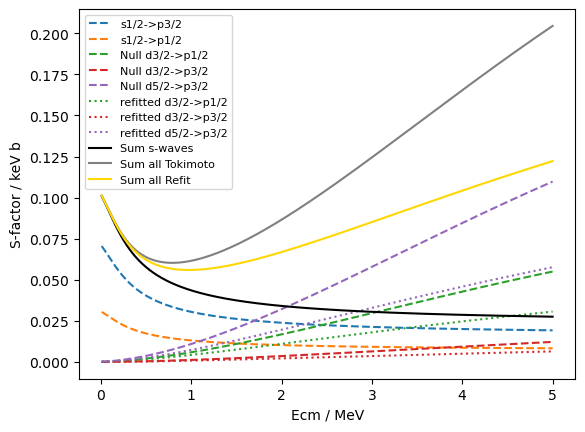

In [40]:
df_S_dp2_pp = df_from_sca("./results/Li7WS_dp2_pp.sca")

plt.plot(df_S_s_pp["Energy_MeV"], df_S_s_pp["S_factor_KeVb"], '--', label='s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_s_pm["S_factor_KeVb"], '--', label='s1/2->p1/2')
plt.plot(df_S_dm_pm["Energy_MeV"], df_S_dm_pm["S_factor_KeVb"], '--', label='Null d3/2->p1/2')
plt.plot(df_S_dm_pp["Energy_MeV"], df_S_dm_pp["S_factor_KeVb"], '--', label='Null d3/2->p3/2')
plt.plot(df_S_dp_pp["Energy_MeV"], df_S_dp_pp["S_factor_KeVb"], '--', label='Null d5/2->p3/2')
plt.plot(df_S_dm2_pm["Energy_MeV"], df_S_dm2_pm["S_factor_KeVb"], 'C2:', label='refitted d3/2->p1/2')
plt.plot(df_S_dm2_pp["Energy_MeV"], df_S_dm2_pp["S_factor_KeVb"], 'C3:', label='refitted d3/2->p3/2')
plt.plot(df_S_dp2_pp["Energy_MeV"], df_S_dp2_pp["S_factor_KeVb"], 'C4:', label='refitted d5/2->p3/2')


Sfactor_refitTot = Sfactor_Ts + df_S_dm2_pm["S_factor_KeVb"] + df_S_dm2_pp["S_factor_KeVb"] + df_S_dp2_pp["S_factor_KeVb"]

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Tot, 'gray', label='Sum all Tokimoto')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_refitTot, 'gold', label='Sum all Refit')


plt.legend(fontsize=8, markerscale=0.8)
plt.xlabel("Ecm / MeV")
plt.ylabel("S-factor / keV b")
# plt.yscale('log')

Text(0.5, 1.0, 'Quotient between S-factor with Reffited over Null potential ')

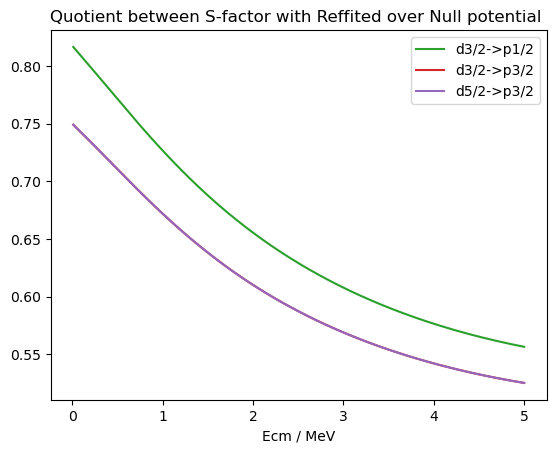

In [41]:
plt.plot(df_S_dm2_pm["Energy_MeV"], df_S_dm2_pm["S_factor_KeVb"]/df_S_dm_pm["S_factor_KeVb"], 'C2', label='d3/2->p1/2')
plt.plot(df_S_dm2_pp["Energy_MeV"], df_S_dm2_pp["S_factor_KeVb"]/df_S_dm_pp["S_factor_KeVb"], 'C3', label='d3/2->p3/2')
plt.plot(df_S_dp2_pp["Energy_MeV"], df_S_dp2_pp["S_factor_KeVb"]/df_S_dp_pp["S_factor_KeVb"], 'C4', label='d5/2->p3/2')
plt.legend()
plt.xlabel("Ecm / MeV")
plt.title("Quotient between S-factor with Reffited over Null potential ")

Text(0.5, 1.0, 'All data in Bystritsky Fig 11 style')

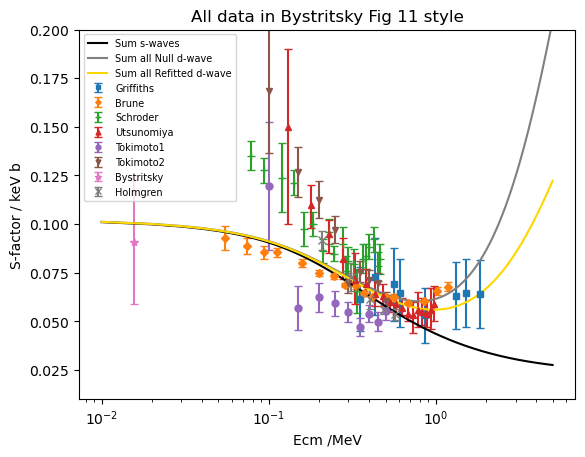

In [42]:
# All of them
plt.errorbar(df_Griffiths['EN_MEV'], 
             df_Griffiths['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Griffiths['1DATA_B*KEV'])*0.27]*2), 
             fmt='s', markersize=4, capsize=3, label='Griffiths')

plt.errorbar(df_Brune['EN-CM_KEV']*1e-3, 
             df_Brune['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Brune['DATA-ERR_B*KEV'])]*2), 
             fmt='D', markersize=4, capsize=3, label='Brune')

plt.errorbar(df_Schroder['EN-CM_MEV'], 
             df_Schroder['DATA_MB*MEV'], 
             yerr=np.vstack([np.array(df_Schroder['DATA-ERR_MB*MEV'])]*2), 
             fmt='+', markersize=6, capsize=3, label='Schroder')

plt.errorbar(df_Utsunomiya['e_KEV']*1e-3, 
             df_Utsunomiya['S(e)_B*KEV'], 
             yerr=np.vstack([
                 np.array(df_Utsunomiya['Error-minus_B*KEV']), 
                 np.array(df_Utsunomiya['Error-plus_B*KEV']), 
             ]), 
             fmt='^', markersize=5, capsize=3, label='Utsunomiya')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['1DATA-ERR_B*KEV'])]*2), 
             fmt='o', markersize=5, capsize=3, label='Tokimoto1')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['2DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['2DATA-ERR_B*KEV'])]*2), 
             fmt='v', markersize=5, capsize=3, label='Tokimoto2')

plt.errorbar(df_Bystritsky['EN-CM_KEV']*1e-3, 
             df_Bystritsky['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Bystritsky['ERR-S_B*KEV'])]*2), 
             fmt='*', markersize=6, capsize=3, label='Bystritsky')

plt.errorbar(df_Holmgren['EN-CM_MEV'],
             df_Holmgren['Sfactor_MB*MEV'], 
             yerr=np.vstack([np.array(df_Holmgren['Sfactor-ERR_MB*MEV'])]*2), 
             fmt='x', markersize=6, capsize=3, label='Holmgren')

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Tot, 'gray', label='Sum all Null d-wave')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_refitTot, 'gold', label='Sum all Refitted d-wave')

plt.xscale('log')
plt.legend(fontsize=7, markerscale=0.7)
plt.xlabel("Ecm /MeV")
plt.ylabel("S-factor / keV b")
plt.ylim((0.01, 0.2))
plt.title("All data in Bystritsky Fig 11 style")

## Conclusion

#### The total S-factor with the refitted potentials for d-waves follow quite better Utsunomiya and Griffitths data at aroung 1 MeV
#### At low energies the the tails are equal.

# Try to change the contributions with the ANCs 

In [45]:
ANC_pp = 3.70258492
ANC_pm = 3.07392059
ANC_Igamov_gro = 3.57 # 3.57 +- 0.15
ANC_Igamov_exc = 3.00 # 3.00 +- 0.15

weight_ppANC = (ANC_Igamov_gro/ANC_pp)**2
weight_pmANC = (ANC_Igamov_exc/ANC_pm)**2

Sfactor_ANC = (
    ( df_S_s_pp["S_factor_KeVb"] + df_S_dm2_pp["S_factor_KeVb"] + df_S_dp2_pp["S_factor_KeVb"] ) * weight_ppANC + 
    ( df_S_s_pm["S_factor_KeVb"] + df_S_dm2_pm["S_factor_KeVb"] ) * weight_pmANC
)

Text(0.5, 1.0, 'Reproduction of Bystritsky Fig 1')

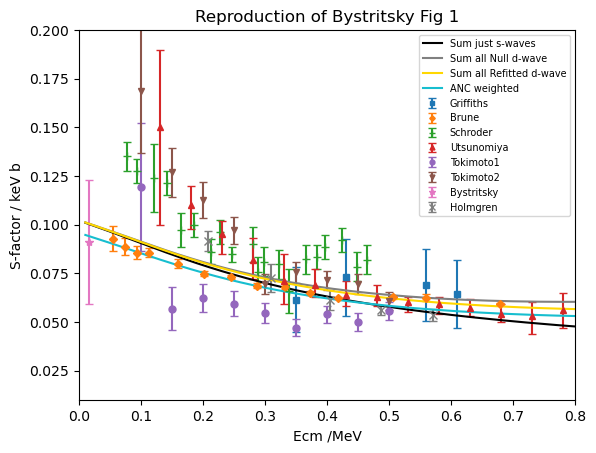

In [46]:
# All of them
%matplotlib inline
# %matplotlib qt
plt.errorbar(df_Griffiths['EN_MEV'], 
             df_Griffiths['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Griffiths['1DATA_B*KEV'])*0.27]*2), 
             fmt='s', markersize=4, capsize=3, label='Griffiths')

plt.errorbar(df_Brune['EN-CM_KEV']*1e-3, 
             df_Brune['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Brune['DATA-ERR_B*KEV'])]*2), 
             fmt='D', markersize=4, capsize=3, label='Brune')

plt.errorbar(df_Schroder['EN-CM_MEV'], 
             df_Schroder['DATA_MB*MEV'], 
             yerr=np.vstack([np.array(df_Schroder['DATA-ERR_MB*MEV'])]*2), 
             fmt='+', markersize=6, capsize=3, label='Schroder')

plt.errorbar(df_Utsunomiya['e_KEV']*1e-3, 
             df_Utsunomiya['S(e)_B*KEV'], 
             yerr=np.vstack([
                 np.array(df_Utsunomiya['Error-minus_B*KEV']), 
                 np.array(df_Utsunomiya['Error-plus_B*KEV']), 
             ]), 
             fmt='^', markersize=5, capsize=3, label='Utsunomiya')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['1DATA-ERR_B*KEV'])]*2), 
             fmt='o', markersize=5, capsize=3, label='Tokimoto1')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['2DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['2DATA-ERR_B*KEV'])]*2), 
             fmt='v', markersize=5, capsize=3, label='Tokimoto2')

plt.errorbar(df_Bystritsky['EN-CM_KEV']*1e-3, 
             df_Bystritsky['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Bystritsky['ERR-S_B*KEV'])]*2), 
             fmt='*', markersize=6, capsize=3, label='Bystritsky')

plt.errorbar(df_Holmgren['EN-CM_MEV'],
             df_Holmgren['Sfactor_MB*MEV'], 
             yerr=np.vstack([np.array(df_Holmgren['Sfactor-ERR_MB*MEV'])]*2), 
             fmt='x', markersize=6, capsize=3, label='Holmgren')

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, 'k', label='Sum just s-waves')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_Tot, 'gray', label='Sum all Null d-wave')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_refitTot, 'gold', label='Sum all Refitted d-wave')
plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_ANC, 'C9', label='ANC weighted')

# plt.xscale('log')
plt.legend(fontsize=7, markerscale=0.7)
plt.xlabel("Ecm /MeV")
plt.ylabel("S-factor / keV b")
plt.ylim((0.01, 0.2))
plt.xlim((0,0.8))
plt.title("Reproduction of Bystritsky Fig 1")

## Conclusions
#### Best agreement. In the tail at low energies following Brune data and around 1 MeV with Utsunomiya, Brune, Griffiths

# Check how much different is S-factor for Tokimoto's p-waves potentials 
Just check transitions from s-wave

0.01 0.0905399 0.1009723 10.331942522850321


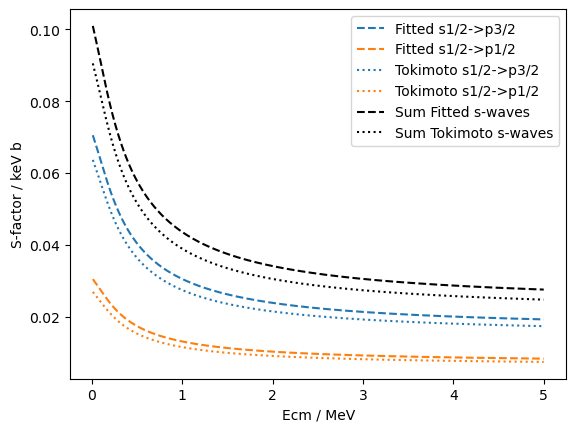

In [49]:
df_S_sTok_pm = df_from_sca("./results/Li7WS_sTok_pm.sca")
df_S_sTok_pp = df_from_sca("./results/Li7WS_sTok_pp.sca")

plt.plot(df_S_s_pp["Energy_MeV"], df_S_s_pp["S_factor_KeVb"], '--', label='Fitted s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_s_pm["S_factor_KeVb"], '--', label='Fitted s1/2->p1/2')
plt.plot(df_S_s_pp["Energy_MeV"], df_S_sTok_pp["S_factor_KeVb"], ':C0', label='Tokimoto s1/2->p3/2')
plt.plot(df_S_s_pm["Energy_MeV"], df_S_sTok_pm["S_factor_KeVb"], ':C1', label='Tokimoto s1/2->p1/2')

Sfactor_TsTok = df_S_sTok_pp["S_factor_KeVb"] + df_S_sTok_pm["S_factor_KeVb"]
plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_Ts, '--k', label='Sum Fitted s-waves')
plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_TsTok, ':k', label='Sum Tokimoto s-waves')
plt.legend()
plt.xlabel("Ecm / MeV")
plt.ylabel("S-factor / keV b")

print(df_S_s_pp["Energy_MeV"][0], Sfactor_TsTok[0], Sfactor_Ts[0], (Sfactor_Ts[0]-Sfactor_TsTok[0])/Sfactor_Ts[0]*100 )

## Conclusion

#### The predicted S(0) by Tokimoto's potential for p-waves is 10% smaller that predicted one by reffited potential. 
#### A too small value to be coherent with Tokimoto's results of clearly S(0) > 0.10 keV b in Fig1. or Brune results of S(0) = 0.13—0.16 keV b,

# Investigate Branching Ratio 
From Brune's paper estimation of R:

#### Griffiths R ~ 0.4

#### Schröder R = 0.32+-0.01

#### Burzynski R ~ 0.51

#### Calculations R in (0.41, 0.47)

· T. Kajino, Nucl. Phys. A460, 559 (1986).

· T. Altmeyer, E. Kolbe, T. Warmann, K. Langanke, and 
H. J. Assenbaum, Z. Phys. A 330, 277 (1988)

· P. Mohr, H. Abele, R. Zwiebel, G. Staudt, H. Krauss, 
H. Oberhummer, A. Denker, J. W. Hammer, an 
G. Wolf, Phys. Rev. C 48, 1420 (1993)

· T. Kajino, G. J. Mathews, and K. Ikeda, Phys. Rev. C 
40, 525 (1989)

#### Brune = 0.453

(0.055083, 1.2894)

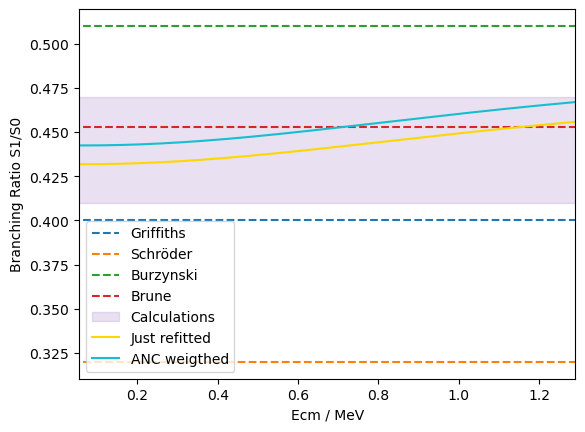

In [52]:
Sfactor_pp = df_S_s_pp["S_factor_KeVb"] + df_S_dm2_pp["S_factor_KeVb"] + df_S_dp2_pp["S_factor_KeVb"]
Sfactor_pm = df_S_s_pm["S_factor_KeVb"] + df_S_dm2_pm["S_factor_KeVb"]


plt.plot(df_S_s_pp["Energy_MeV"], [0.4]*len(df_S_s_pp), '--C0', label='Griffiths')

plt.plot(df_S_s_pp["Energy_MeV"], [0.32]*len(df_S_s_pp), '--C1', label='Schröder')
# plt.plot(df_S_s_pp["Energy_MeV"], [0.32+0.01]*len(df_S_s_pp), ':C1')
# plt.plot(df_S_s_pp["Energy_MeV"], [0.32-0.01]*len(df_S_s_pp), ':C1')

# plt.errorbar(df_S_s_pp["Energy_MeV"], 
#              [0.32]*len(df_S_s_pp), 
#              yerr=np.vstack([[0.01]*len(df_S_s_pp), [0.01]*len(df_S_s_pp)]), 
#              fmt='-', color='C1', markersize=1, capsize=2, label='Schroder')

plt.plot(df_S_s_pp["Energy_MeV"], [0.51]*len(df_S_s_pp), '--C2', label='Burzynski')

plt.plot(df_S_s_pp["Energy_MeV"], [0.453]*len(df_S_s_pp), '--C3', label='Brune')

plt.fill_between(df_S_s_pp["Energy_MeV"], [0.41]*len(df_S_s_pp), [0.47]*len(df_S_s_pp), alpha=0.2, color="C4", label="Calculations")

plt.plot(df_S_s_pp["Energy_MeV"], Sfactor_pm/Sfactor_pp, 'gold', label='Just refitted')
plt.plot(df_S_s_pp["Energy_MeV"], (Sfactor_pm*weight_pmANC)/(Sfactor_pp*weight_ppANC), 'C9', label='ANC weigthed')


plt.legend()
plt.xlabel("Ecm / MeV")
plt.ylabel("Branching Ratio S1/S0")
plt.xlim((min(df_Brune['EN-CM_KEV']*1e-3),0.1+max(df_Brune['EN-CM_KEV']*1e-3)))
# plt.xscale('log')

# Final Fig
Use the error of Igavow in ANC to give error in S-factor. Data from S.B. Igamov, R. Yarmukhamedov. page 20.

$\left( C_{\alpha t}^{exp} \right)^2 = 12.74 \pm 1.10 fm^{-1} \qquad \left( C_{\alpha t}^{* exp} \right)^2 = 9.00 \pm 0.90 fm^{-1}$

Error propagation: S-factor = (transitions to p3/2) * weight_ppANC + (transitions to p1/2) * weight_pmANC

Thus, it is a problem of $r = a x+b y$ where $a,b$ are constant's without error and $x,y$ have different error. 

Considering independency between $x$ and $y$, by additivity of variance $\sigma_r ^2 = a^2 \sigma_x^2 +b^2 \sigma_y^2$


Text(0.5, 1.0, 'All data in Bystritsky Fig 11 style')

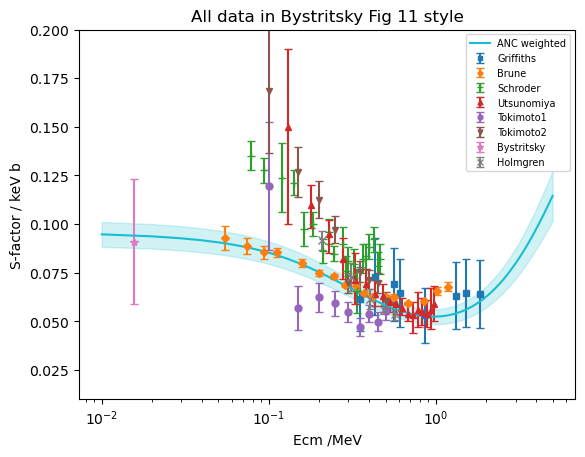

In [54]:
# All of them
plt.errorbar(df_Griffiths['EN_MEV'], 
             df_Griffiths['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Griffiths['1DATA_B*KEV'])*0.27]*2), 
             fmt='s', markersize=4, capsize=3, label='Griffiths')

plt.errorbar(df_Brune['EN-CM_KEV']*1e-3, 
             df_Brune['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Brune['DATA-ERR_B*KEV'])]*2), 
             fmt='D', markersize=4, capsize=3, label='Brune')

plt.errorbar(df_Schroder['EN-CM_MEV'], 
             df_Schroder['DATA_MB*MEV'], 
             yerr=np.vstack([np.array(df_Schroder['DATA-ERR_MB*MEV'])]*2), 
             fmt='+', markersize=6, capsize=3, label='Schroder')

plt.errorbar(df_Utsunomiya['e_KEV']*1e-3, 
             df_Utsunomiya['S(e)_B*KEV'], 
             yerr=np.vstack([
                 np.array(df_Utsunomiya['Error-minus_B*KEV']), 
                 np.array(df_Utsunomiya['Error-plus_B*KEV']), 
             ]), 
             fmt='^', markersize=5, capsize=3, label='Utsunomiya')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['1DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['1DATA-ERR_B*KEV'])]*2), 
             fmt='o', markersize=5, capsize=3, label='Tokimoto1')

plt.errorbar(df_Tokimoto['EN-CM_MEV'], 
             df_Tokimoto['2DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Tokimoto['2DATA-ERR_B*KEV'])]*2), 
             fmt='v', markersize=5, capsize=3, label='Tokimoto2')

plt.errorbar(df_Bystritsky['EN-CM_KEV']*1e-3, 
             df_Bystritsky['DATA_B*KEV'], 
             yerr=np.vstack([np.array(df_Bystritsky['ERR-S_B*KEV'])]*2), 
             fmt='*', markersize=6, capsize=3, label='Bystritsky')

plt.errorbar(df_Holmgren['EN-CM_MEV'],
             df_Holmgren['Sfactor_MB*MEV'], 
             yerr=np.vstack([np.array(df_Holmgren['Sfactor-ERR_MB*MEV'])]*2), 
             fmt='x', markersize=6, capsize=3, label='Holmgren')

a = (df_S_s_pp["S_factor_KeVb"]+df_S_dm_pp["S_factor_KeVb"]+df_S_dp_pp["S_factor_KeVb"])/(ANC_pp)**2
b = (df_S_s_pm["S_factor_KeVb"]+df_S_dm_pm["S_factor_KeVb"])/(ANC_pm)**2
Sfactor_ANC_err = np.sqrt(a*a*1.10**2 + b*b*0.90**2)

plt.plot(df_S_s_pm["Energy_MeV"], Sfactor_ANC, 'C9', label='ANC weighted')
plt.fill_between(df_S_s_pm["Energy_MeV"], Sfactor_ANC-Sfactor_ANC_err, Sfactor_ANC+Sfactor_ANC_err, alpha=0.2, color="C9")


plt.xscale('log')
plt.legend(fontsize=7, markerscale=0.7)
plt.xlabel("Ecm /MeV")
plt.ylabel("S-factor / keV b")
plt.ylim((0.01, 0.2))
plt.title("All data in Bystritsky Fig 11 style")